In [382]:
import pandas as pd
import csv
with open('test.csv') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    csvfile.seek(0)
    reader = csv.reader(csvfile, dialect)

df = pd.read_csv('test.csv',**{key:dict(dialect.__dict__)[key] for key in ['quoting','delimiter','doublequote','quotechar']})


bat = df[['Nr','Kapacitet','mR','maxCap']]
bat = bat[bat['maxCap']>0]
bat['cap_perc'] = bat['Kapacitet']/bat['maxCap']

#bat = bat[bat['cap_perc']>0.75]
bat = bat[(bat['Kapacitet']>1200) & (bat['Kapacitet']<2500)]
bat = bat[~bat['Nr'].isin([85,86,69,70,71,72])]

bat = bat.sort_values('Kapacitet')
bat = bat.to_dict('records')
bat_classes = []
for i in bat:
    bat_classes.append(Battery(num=i['Nr'],cap=i['Kapacitet'],max_cap=i['maxCap'],int_res=i['mR']))
print(len(bat))

88


In [372]:
import numpy as np
class BatteryPack:
    def __init__(self, size=[1,1]):
        self.size = size
        self.series = [PackSeries(size[1]) for i in range(size[0])]
    
    def is_full(self):
        r = True
        for s in self.series:
            if not s.is_full():
                r = False
        return r
                
    def print_size(self):
        print(str(self.size[0]) + 's' + str(self.size[1]) + 'p')
    
    def add_battery(battery,s_pos):
        self.batteries[s,p]
    
    def get_diff(self):
        series_caps = [s.sum_cap() for s in self.series]
        return max(series_caps) - min (series_caps)
    
    def get_series_caps(self):
        return[s.sum_cap() for s in self.series]
    
    def get_pack_cap(self):
        return np.mean([s.sum_cap() for s in self.series])
            
    def print(self):
        print('Pack cap: ' + str(self.get_pack_cap()))
        print('Pack diff: ' + str(self.get_diff()))
        print(self.get_series_caps())
        for ind, s in enumerate(self.series):
            print('Series num: ' + str(ind))
            for b in s.batteries:
                print('Num: ' + str(b.num) + ', Cap: ' + str(b.cap) + ', maxCap%: ' + str(round((b.cap/b.max_cap)*100,1)) + '%')
        
class Battery:
    def __init__(self, num, cap, max_cap=0, int_res=0):
        self.num = num
        self.cap = cap
        self.max_cap = max_cap
        self.int_res = int_res
        
class PackSeries:
    def __init__(self, length):
        self.length = length
        self.full = False
        self.batteries=[]
    
    def is_full(self):
        return self.full

        
    def sum_cap(self):
        return sum([b.cap for b in self.batteries])
    
    def add_battery(self, battery):
        if len(self.batteries)<self.length:
            self.batteries.append(battery)
            if len(self.batteries)==self.length:
                self.full = True
        else:
            raise ValueError('Series Full')

In [373]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

        
def run_(bats,pack):
    bats = list(chunkIt(bat_classes,4))
    for chunk in bats:
        random.shuffle(chunk)
        for s in pack.series:
            s.add_battery(chunk.pop())
   
    return True#{'diff':diff,'res':res,'pack':[l0,l1,l2,l3,l4,l5,l6,l7,l8,l9]}
    

In [374]:
import random
imp = []
for i in range(0,100000):
    pack = BatteryPack(size=[10,4])
    run_(bat_classes,pack)
    if pack.get_diff() < 30:
        print(pack.get_diff())
        
        imp.append(pack)
        break;
imp[0].print()

28.0
Pack cap: 9176.1
Pack diff: 28.0
[9179.0, 9184.0, 9181.0, 9168.0, 9181.0, 9166.0, 9184.0, 9180.0, 9156.0, 9182.0]
Series num: 0
Num: 138, Cap: 2172.0, maxCap%: 82.0%
Num: 128, Cap: 2289.0, maxCap%: 88.0%
Num: 19, Cap: 2323.0, maxCap%: 105.6%
Num: 119, Cap: 2395.0, maxCap%: 93.9%
Series num: 1
Num: 91, Cap: 2185.0, maxCap%: 82.5%
Num: 126, Cap: 2285.0, maxCap%: 87.9%
Num: 132, Cap: 2343.0, maxCap%: 106.5%
Num: 116, Cap: 2371.0, maxCap%: 93.0%
Series num: 2
Num: 111, Cap: 2165.0, maxCap%: 98.4%
Num: 135, Cap: 2264.0, maxCap%: 87.1%
Num: 98, Cap: 2332.0, maxCap%: 91.5%
Num: 129, Cap: 2420.0, maxCap%: 93.1%
Series num: 3
Num: 139, Cap: 2185.0, maxCap%: 82.5%
Num: 134, Cap: 2260.0, maxCap%: 86.9%
Num: 100, Cap: 2308.0, maxCap%: 90.5%
Num: 118, Cap: 2415.0, maxCap%: 94.7%
Series num: 4
Num: 121, Cap: 2181.0, maxCap%: 99.1%
Num: 52, Cap: 2277.0, maxCap%: 87.6%
Num: 124, Cap: 2334.0, maxCap%: 89.8%
Num: 117, Cap: 2389.0, maxCap%: 93.7%
Series num: 5
Num: 120, Cap: 2187.0, maxCap%: 99.4%
N

In [313]:
imp[0].series[0].batteries[0].max_cap

1924.0

<AxesSubplot:>

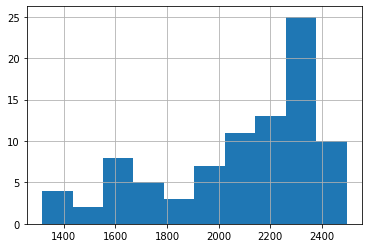

In [389]:
pd.DataFrame(bat)['Kapacitet'].hist()